This script read the results stored in `results.pkl` pickle file and create barplot of expected profit, training RMSE, and test RMSE for the following companies:
- Russia - Sberbank Rossii PAO (SBER)
- Turkey - Koc Holding AS (KCHOL)
- Egypt - Medinet Nasr Housing (MNH)
- Brazil - Minerva SABrazil (BEEF3)
- Argentina - Pampa Energia SA (PAMP)
- South Africa - Impala Platinum Holdings Ltd (IMPJ) 

In [1]:
company_name = ['SBER', 'KCHOL', 'MNH', 'BEEF', 'PAMP', 'IMPJ']

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('results.pkl', 'rb') as fp:
    saved_results = pickle.load(fp)

saved_results

{'Russia-SBER': {'profit': [array([114.31]), array([92.8]), array([89.])],
  'train_rmse': [1.137973331058554e-11, 1.41982500267595, 1.3312929083569305],
  'test_rmse': [1.1425527191022411e-11,
   1.3171966344581723,
   2.6434392871837824],
  'Dream Profit': array([114.31])},
 'Turkey-KCHOL': {'profit': [array([10.32]), array([10.56]), array([10.5])],
  'train_rmse': [3.205857705034359e-11,
   0.12385419273209275,
   0.11000401030838157],
  'test_rmse': [3.218758592993254e-11, 0.3166422555805431, 0.1962523818340984],
  'Dream Profit': array([10.32])},
 'Egypt-MNH': {'profit': [array([0.82]), array([0.91]), array([0.99])],
  'train_rmse': [2.1458626164816203e-09,
   0.031332539723704554,
   0.018049807204560637],
  'test_rmse': [2.154497913409159e-09,
   0.016326243537252354,
   0.013702526877466313],
  'Dream Profit': array([0.82])},
 'RBrazil-BEEF3': {'profit': [array([5.26]), array([5.27]), array([5.32])],
  'train_rmse': [1.5549294487988672e-10,
   0.12967405273823457,
   0.12985372

### Expected Profit

In [4]:
r_arima, lstm, prophet = [], [], []
for company in saved_results:
    r_arima.append(saved_results[company]['profit'][0][0])
    lstm.append(saved_results[company]['profit'][1][0])
    prophet.append(saved_results[company]['profit'][2][0])

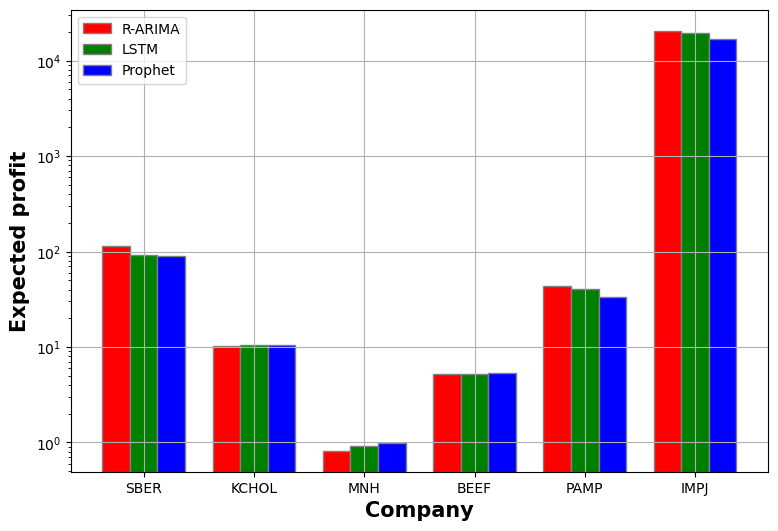

In [5]:
barWidth = 0.25
plt.figure(figsize=(9, 6))
# Set position of bar on X axis 
br1 = np.arange(len(r_arima)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
 
# Make the plot
plt.bar(br1, r_arima, color ='r', width = barWidth, 
        edgecolor ='grey', label ='R-ARIMA') 
plt.bar(br2, lstm, color ='g', width = barWidth, 
        edgecolor ='grey', label ='LSTM') 
plt.bar(br3, prophet, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Prophet') 
 
# Adding Xticks 
plt.xlabel('Company', fontweight ='bold', fontsize = 15) 
plt.ylabel('Expected profit', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(r_arima))], company_name)
 
plt.yscale('log')
plt.grid()
plt.legend()
plt.savefig('plots/profit.jpeg', dpi=300)
plt.show() 

### Training RMSE

In [6]:
r_arima, lstm, prophet = [], [], []
for company in saved_results:
    r_arima.append(saved_results[company]['train_rmse'][0])
    lstm.append(saved_results[company]['train_rmse'][1])
    prophet.append(saved_results[company]['train_rmse'][2])

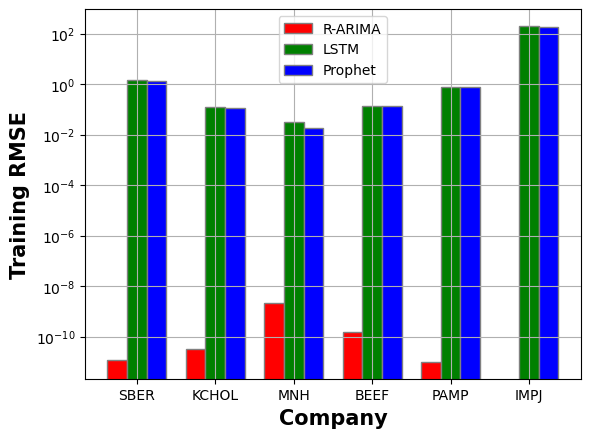

In [7]:
barWidth = 0.25
plt.figure()
# Set position of bar on X axis 
br1 = np.arange(len(r_arima)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
 
# Make the plot
plt.bar(br1, r_arima, color ='r', width = barWidth, 
        edgecolor ='grey', label ='R-ARIMA') 
plt.bar(br2, lstm, color ='g', width = barWidth, 
        edgecolor ='grey', label ='LSTM') 
plt.bar(br3, prophet, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Prophet') 
 
# Adding Xticks 
plt.xlabel('Company', fontweight ='bold', fontsize = 15) 
plt.ylabel('Training RMSE', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(r_arima))], company_name)
 
plt.yscale('log')
plt.grid()
plt.legend()
plt.show() 

### Test RMSE

In [8]:
r_arima, lstm, prophet = [], [], []
for company in saved_results:
    r_arima.append(saved_results[company]['test_rmse'][0])
    lstm.append(saved_results[company]['test_rmse'][1])
    prophet.append(saved_results[company]['test_rmse'][2])

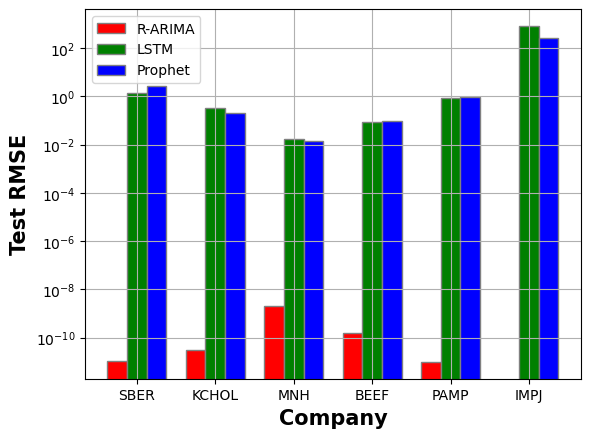

In [9]:
barWidth = 0.25
plt.figure()
# Set position of bar on X axis 
br1 = np.arange(len(r_arima)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
 
# Make the plot
plt.bar(br1, r_arima, color ='r', width = barWidth, 
        edgecolor ='grey', label ='R-ARIMA') 
plt.bar(br2, lstm, color ='g', width = barWidth, 
        edgecolor ='grey', label ='LSTM') 
plt.bar(br3, prophet, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Prophet') 
 
# Adding Xticks 
plt.xlabel('Company', fontweight ='bold', fontsize = 15) 
plt.ylabel('Test RMSE', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(r_arima))], company_name)

plt.yscale('log')
plt.grid()
plt.legend()
plt.show() 

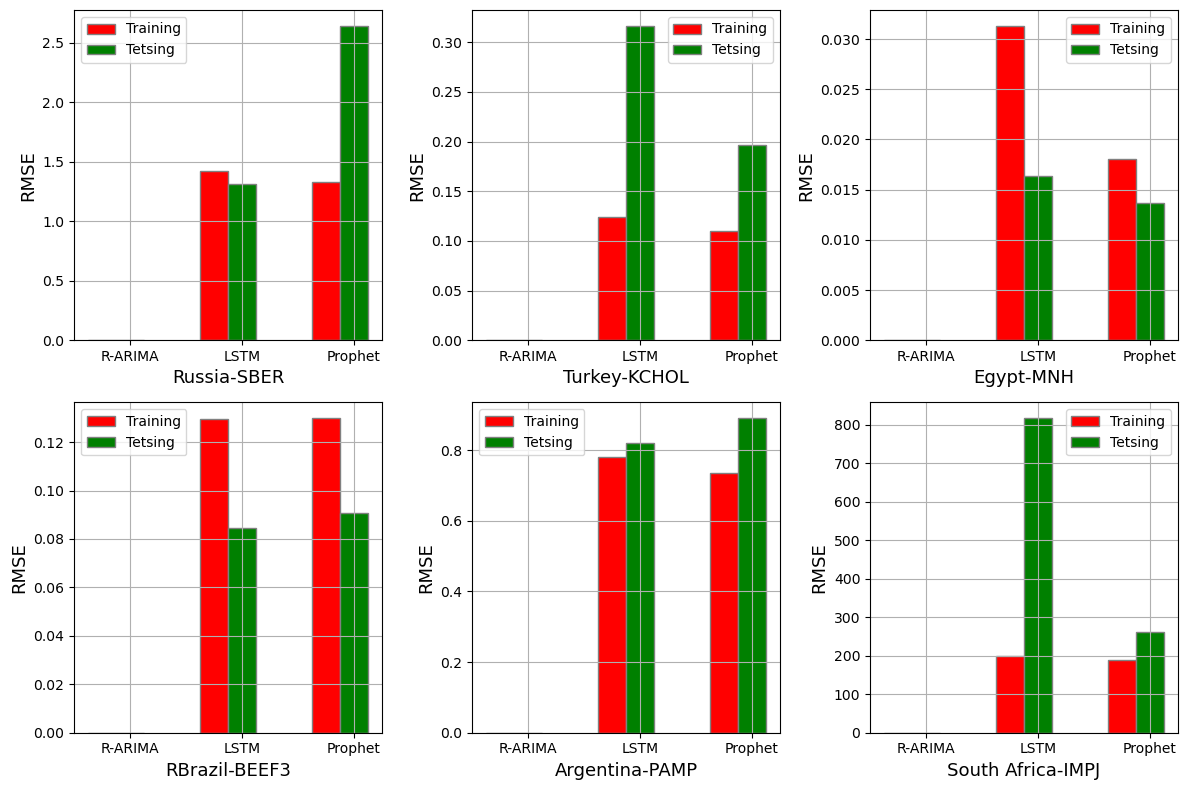

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 

plot_num = [[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2]]
counter = 0
for xy in saved_results:
# Make the plot
    axis = ax[plot_num[counter][0], plot_num[counter][1]]
    axis.bar(br1, saved_results[xy]['train_rmse'], color ='r', width = barWidth, 
            edgecolor ='grey', label ='Training') 
    axis.bar(br2, saved_results[xy]['test_rmse'], color ='g', width = barWidth, 
            edgecolor ='grey', label ='Tetsing') 
    counter += 1
 
    # Adding Xticks 
    axis.set_xlabel(xy, fontsize = 13) 
    axis.set_ylabel('RMSE', fontsize = 13) 
    axis.set_xticks([r + barWidth for r in range(3)], ['R-ARIMA', 'LSTM', 'Prophet'])
    axis.grid()
    axis.legend()
plt.tight_layout()
plt.savefig('plots/rmse.jpeg', dpi=300)
plt.show()